In [ ]:
import pandas as pd


In [ ]:
df = pd.read_excel('/content/New Bank_loan_data (1) (2) (1) (2) (1).xlsx')
df.head()

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1


In [ ]:
r, c = df.shape
print(r)

5000


Checking the unique values in columns


In [ ]:
def get_unique_values(df , cols):
    for col in cols :
        print("-"*100)
        print(f"The Unique Values for the Columns {col} are:")
        print(df[col].unique())
        print("-"*100)

In [ ]:
get_unique_values(df, list(df.columns))

----------------------------------------------------------------------------------------------------
The Unique Values for the Columns ID are:
[   1    2    3 ... 4998 4999 5000]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Age are:
[ 25  45  39  35  37  53  50  34  65  29  48  59  67  60  38  42  46  55
  56  57  44  36  43  40  30  31  51  32  97  61 567  41  28  49  47  62
  58   0  33  27  13  54  66  24  52 122  26  64  63  23 978   2   4 786
 600   7   8 797]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Gender are:
['M' 'F' 'O' nan '#' '-']
-----------------------------------------------------------------

Checking for NA values in the dataset

In [ ]:
df.isna().sum()

ID                       0
Age                      0
Gender                1596
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

In [ ]:
#The dataset contains ages such as 2, 4, 797, etc which are not realistic so we will be removing these data from the dataset

df = df[(df['Age'] <100) & (df['Age']>18)]
df

,ID,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,M,1,49.0,91107,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,2,45,M,19,34.0,90089,3,1.5,1,0,Rent,0,1,0,0.0,0
2,3,39,M,15,11.0,94720,1,1.0,1,0,Rent,0,0,0,0.0,0
3,4,35,M,9,100.0,94112,1,2.7,2,0,Rent,0,0,0,0.0,0
4,5,35,M,8,45.0,91330,4,1.0,2,0,Rent,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,NaN,3,40.0,92697,1,1.9,3,0,NaN,0,0,0,1.0,0
4996,4997,30,NaN,4,15.0,92037,4,0.4,1,85,NaN,0,0,0,1.0,0
4997,4998,63,NaN,39,24.0,93023,2,0.3,3,0,NaN,0,0,0,0.0,0
4998,4999,65,NaN,40,49.0,90034,3,0.5,2,0,NaN,0,0,0,1.0,0


In [ ]:
#The Loan approval should not depend on a person's Gender and ZIP Code while ID is unique to everyone which is why we will be removing these columns.

df.drop(['Gender', 'ZIP Code', 'ID'], axis = 1, inplace = True)

<ipython-input-8-0b758ea83455>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Gender', 'ZIP Code', 'ID'], axis = 1, inplace = True)


In [ ]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,45,19,34.0,3,1.5,1,0,Rent,0,1,0,0.0,0
2,39,15,11.0,1,1.0,1,0,Rent,0,0,0,0.0,0
3,35,9,100.0,1,2.7,2,0,Rent,0,0,0,0.0,0
4,35,8,45.0,4,1.0,2,0,Rent,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0,NaN,0,0,0,1.0,0
4996,30,4,15.0,4,0.4,1,85,NaN,0,0,0,1.0,0
4997,63,39,24.0,2,0.3,3,0,NaN,0,0,0,0.0,0
4998,65,40,49.0,3,0.5,2,0,NaN,0,0,0,1.0,0


In [ ]:
df['Age'].unique()

array([25, 45, 39, 35, 37, 53, 50, 34, 65, 29, 48, 59, 67, 60, 38, 42, 46,
       55, 56, 57, 44, 36, 43, 40, 30, 31, 51, 32, 97, 61, 41, 28, 49, 47,
       62, 58, 33, 27, 54, 66, 24, 52, 26, 64, 63, 23])

In [ ]:
#Checking for NA values again

df.isna().sum()

Age                      0
Experience               0
Income                  66
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                  39
CreditCard               0
dtype: int64

In [ ]:
#Here we drop the data with na values from the Income and Online Columns as the total amount of NA values is low

df.dropna(subset = ['Income', 'Online'], inplace = True)

In [ ]:
df.isna().sum()

Age                      0
Experience               0
Income                   0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                   0
CreditCard               0
dtype: int64

In [ ]:
#Checking for any other errors that are in the data

get_unique_values(df, list(df.columns))

----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Age are:
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 97 61 41 28 49 47 62 58 33 27 54 66 24 52 26 64 63 23]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Experience are:
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
The Unique Values for the Columns Income are:
[ 49.  34.  11. 100.  45.  29.  72.  22.  81. 180. 105. 114.  40. 112.


The dataset still contains some issues.

The issues we will be fixing are:



*   There are experience which is negative which should be positive
*   There are empty strings in the target class Personal Loan



In [ ]:
#Fixing first issue

df['Experience'] = df['Experience'].abs()

In [ ]:
#fixing the second issue

df.replace(' ', pd.NA, inplace = True)

In [ ]:
df.isna().sum()

Age                      0
Experience               0
Income                   0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            1
Securities Account       0
CD Account               0
Online                   0
CreditCard               0
dtype: int64

In [ ]:
df.dropna(subset = ['Personal Loan'], inplace = True)

In [ ]:
df.isna().sum()

Age                      0
Experience               0
Income                   0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        1189
Personal Loan            0
Securities Account       0
CD Account               0
Online                   0
CreditCard               0
dtype: int64

In [ ]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,Home Owner,0,1,0,0.0,0
1,45,19,34.0,3,1.5,1,0,Rent,0,1,0,0.0,0
2,39,15,11.0,1,1.0,1,0,Rent,0,0,0,0.0,0
3,35,9,100.0,1,2.7,2,0,Rent,0,0,0,0.0,0
4,35,8,45.0,4,1.0,2,0,Rent,0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0,NaN,0,0,0,1.0,0
4996,30,4,15.0,4,0.4,1,85,NaN,0,0,0,1.0,0
4997,63,39,24.0,2,0.3,3,0,NaN,0,0,0,0.0,0
4998,65,40,49.0,3,0.5,2,0,NaN,0,0,0,1.0,0


Since the values that are missing for the "Home Ownership" column is 23% of the total data will be lost. So, we are going to create a machine learning model to predict the home ownership.

In [ ]:

df2 = df.copy()

x_fill = df2[df['Home Ownership'].isna()].drop(['Home Ownership', 'Personal Loan'], axis = 1)


df2.dropna(inplace = True)
df2.drop(['Personal Loan'], axis = 1, inplace = True)

y_int = df2['Home Ownership']
x_int = df2.drop(['Home Ownership'], axis = 1)


In [ ]:
df2

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,Home Owner,1,0,0.0,0
1,45,19,34.0,3,1.5,1,0,Rent,1,0,0.0,0
2,39,15,11.0,1,1.0,1,0,Rent,0,0,0.0,0
3,35,9,100.0,1,2.7,2,0,Rent,0,0,0.0,0
4,35,8,45.0,4,1.0,2,0,Rent,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4865,50,24,133.0,4,1.4,2,342,Home Mortage,0,0,0.0,1
4876,44,19,142.0,1,1.5,3,0,Rent,0,0,0.0,0
4883,38,13,129.0,3,4.1,3,0,Rent,0,1,1.0,1
4980,29,5,135.0,3,5.3,1,0,Home Mortage,0,1,1.0,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

In [ ]:
le = LabelEncoder()
y_int = le.fit_transform(y_int)

In [ ]:
x_fill

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
51,61,37,131.0,1,2.9,1,0,0,0,1.0,0
52,30,6,72.0,1,0.1,1,207,0,0,0.0,0
150,46,22,118.0,2,7.5,1,0,0,1,1.0,1
323,59,34,99.0,1,4.4,1,0,0,0,0.0,0
327,58,32,114.0,2,2.0,1,402,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0,0,0,1.0,0
4996,30,4,15.0,4,0.4,1,85,0,0,1.0,0
4997,63,39,24.0,2,0.3,3,0,0,0,0.0,0
4998,65,40,49.0,3,0.5,2,0,0,0,1.0,0


In [ ]:
x_int_train, x_int_test, y_int_train, y_int_test = train_test_split(x_int, y_int, test_size = 0.3, random_state = 45)

In [ ]:
model_int = xgb.XGBClassifier(use_label_encoder=True, eval_metric='logloss')

In [ ]:
model_int.fit(x_int, y_int)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
# Make predictions on the fill data
y_fill = model_int.predict(x_fill)

In [ ]:
y_fill = le.inverse_transform(y_fill)


In [ ]:
len(y_fill)


1189

In [ ]:
list_1 = y_fill.tolist()
set_1 = set(list_1)
set_1

{'Home Mortage', 'Home Owner', 'Rent'}

In [ ]:
list_2 = y_int.tolist()
set_2 = set(list_2)
set_2

{0, 1, 2}

In [ ]:
x_fill['Home Ownership'] = y_fill

In [ ]:
final_df = df2.copy()
final_df = final_df.dropna()
final_df = pd.concat([final_df, x_fill])

In [ ]:
final_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
0,25,1,49.0,4,1.6,1,0,Home Owner,1,0,0.0,0
1,45,19,34.0,3,1.5,1,0,Rent,1,0,0.0,0
2,39,15,11.0,1,1.0,1,0,Rent,0,0,0.0,0
3,35,9,100.0,1,2.7,2,0,Rent,0,0,0.0,0
4,35,8,45.0,4,1.0,2,0,Rent,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40.0,1,1.9,3,0,Home Mortage,0,0,1.0,0
4996,30,4,15.0,4,0.4,1,85,Home Mortage,0,0,1.0,0
4997,63,39,24.0,2,0.3,3,0,Home Mortage,0,0,0.0,0
4998,65,40,49.0,3,0.5,2,0,Home Mortage,0,0,1.0,0


In [ ]:
final_df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Home Ownership        0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
x_fill.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Home Ownership        0
dtype: int64

In [ ]:
final_df['Personal Loan'] = df['Personal Loan']
df = final_df.copy()

Now that we have cleaned all our data, we will be doing EDA.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

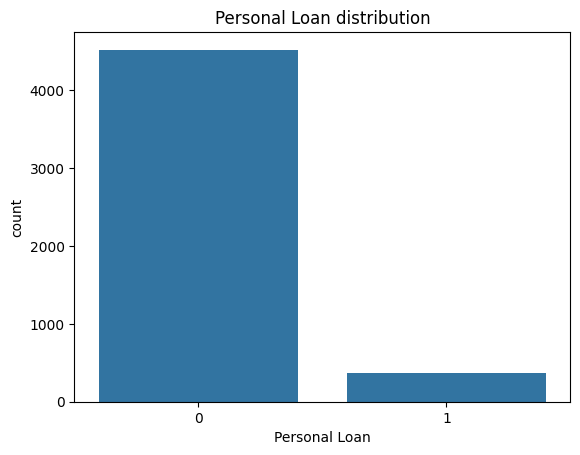

In [ ]:
#Looking at the total target values 'Personal Loan'

plt.title('Personal Loan distribution')
sns.countplot(data=df, x='Personal Loan')
plt.show()

<ipython-input-42-3c04b42ddcde>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_groups, x='Age_range', y='Total_persons', palette='Dark2')


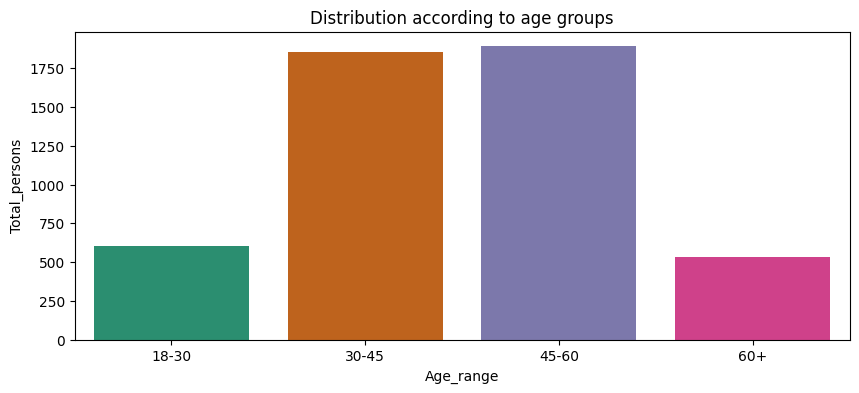

In [ ]:
# Looking at the distribution of ages in the dataset

age = {}
x = 0
ages = df['Age'].value_counts().reindex(range(18, 101), fill_value=0)
for i in range(18, 101):
    x += ages[i]
    if i == 30:
        age['18-30'] = x
        x = 0
    elif i == 45:
        age['30-45'] = x
        x = 0
    elif i == 60:
        age['45-60'] = x
        x = 0
    elif i == 100:
        age['60+'] = x
age_groups = pd.DataFrame({'Age_range': list(age.keys()), 'Total_persons': list(age.values())})
plt.figure(figsize=(10,4), dpi=100)
plt.title('Distribution according to age groups')
sns.barplot(data=age_groups, x='Age_range', y='Total_persons', palette='Dark2')
plt.show()

<Axes: xlabel='Personal Loan', ylabel='Income'>

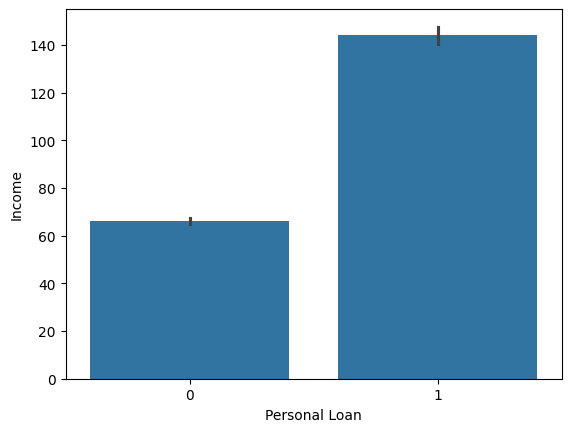

In [ ]:
#Plotting a barplot to see if 'Income' has relation with 'Personal Loan'

sns.barplot(data=df, x="Personal Loan", y="Income")

Here, we can see that the higher the 'Income' the more likely the 'Personal Loan' will be approved.


([0, 1, 2, 3],
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

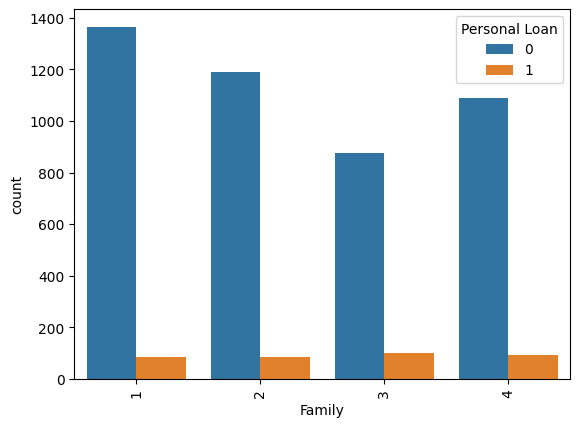

In [ ]:
#Plotting 'Family' with 'Personal Loan'

sns.countplot(data=df, x="Family", hue="Personal Loan")
plt.xticks (rotation='vertical')

<Axes: xlabel='Personal Loan', ylabel='Education'>

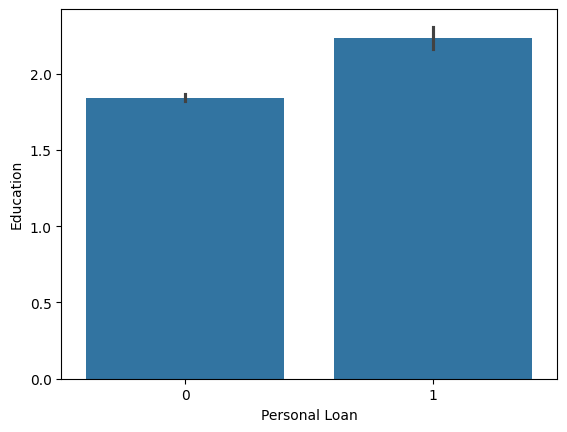

In [ ]:
#Plotting average education with 'Personal Loan'

sns.barplot(data=df, x="Personal Loan", y="Education")

<Axes: xlabel='Personal Loan', ylabel='Mortgage'>

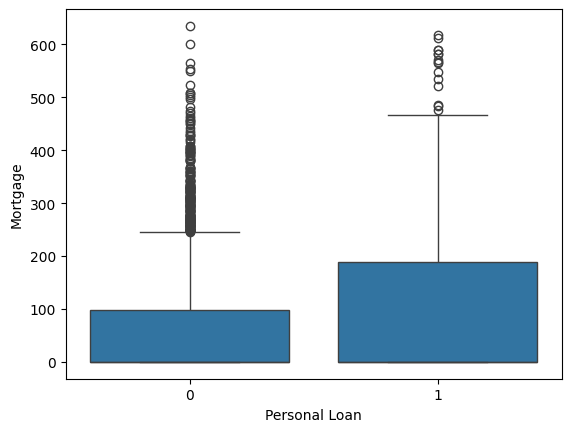

In [ ]:
#Boxplot of "Personal Loan" and "Mortgage"

sns.boxplot(data=df, x="Personal Loan", y="Mortgage")

<Axes: xlabel='Personal Loan', ylabel='CreditCard'>

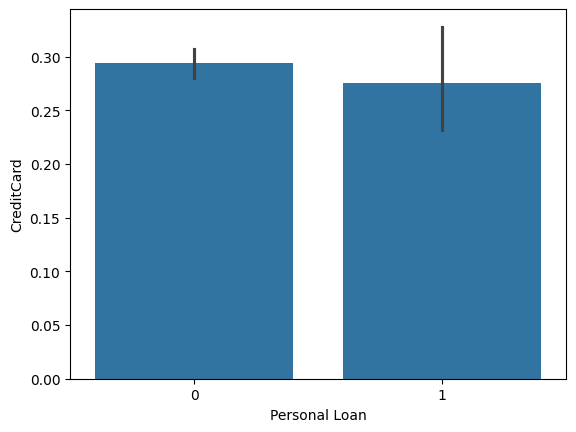

In [ ]:
#Plot of 'Personal loan' and 'CreditCard'

sns.barplot(data=df, x="Personal Loan", y="CreditCard")

Making the model for prediction

We will be using XGBoost model for out prediction

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
y = df['Personal Loan']
x = df.drop(['Personal Loan'], axis = 1)

In [ ]:
le = LabelEncoder()
x['Home Ownership'] = le.fit_transform(x['Home Ownership'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45)

In [ ]:
model = xgb.XGBClassifier(use_label_encoder=True, eval_metric='logloss')

In [ ]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

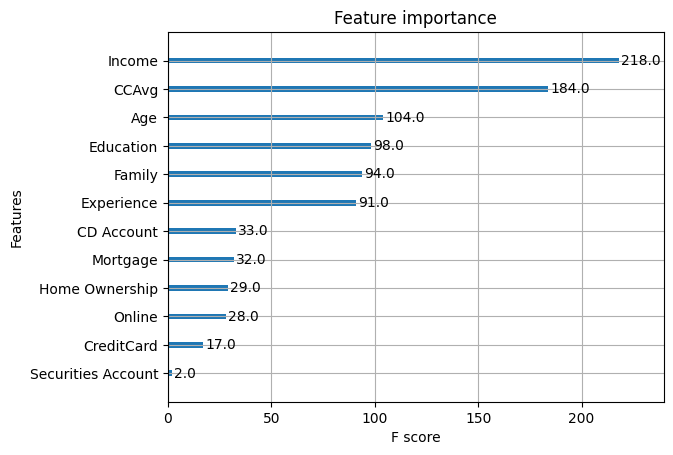

In [ ]:
#Checking the importance of each feature on the target value

from xgboost import plot_importance

plot_importance(model)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
x_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
1165,43,19,113.0,1,1.7,1,0,2,0,0,0.0,0
503,31,5,39.0,4,1.8,3,185,1,0,0,0.0,1
603,63,38,28.0,2,0.5,2,89,2,0,0,1.0,0
3744,54,29,79.0,3,1.6,3,0,1,0,0,0.0,0
462,29,4,183.0,3,8.3,3,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3163,51,27,52.0,2,1.0,3,0,0,0,0,0.0,0
488,37,13,43.0,3,2.8,1,0,2,0,0,1.0,0
2406,31,7,10.0,1,0.5,3,81,1,0,0,1.0,0
1366,60,34,33.0,2,0.3,1,101,1,0,0,1.0,0


We will now evaluate the model and examine its performance

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
y_test = y_test.astype(int).to_numpy()

In [ ]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

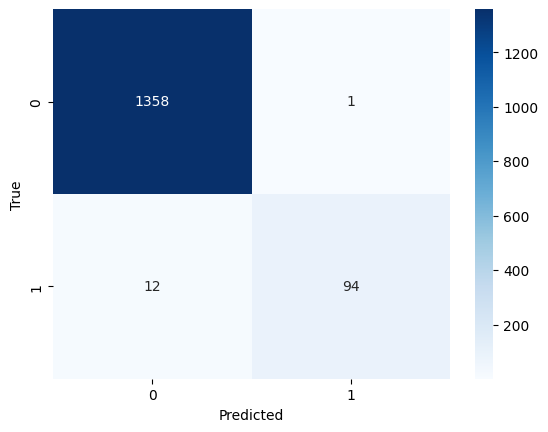

In [ ]:
# Assuming y_true contains the true labels and y_pred contains the predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
#Classification Report of the model

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1359
           1       0.99      0.89      0.94       106

    accuracy                           0.99      1465
   macro avg       0.99      0.94      0.97      1465
weighted avg       0.99      0.99      0.99      1465



In [ ]:
#Total accuracy of the model

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9911262798634812


In [ ]:
x_test

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Home Ownership,Securities Account,CD Account,Online,CreditCard
1165,43,19,113.0,1,1.7,1,0,2,0,0,0.0,0
503,31,5,39.0,4,1.8,3,185,1,0,0,0.0,1
603,63,38,28.0,2,0.5,2,89,2,0,0,1.0,0
3744,54,29,79.0,3,1.6,3,0,1,0,0,0.0,0
462,29,4,183.0,3,8.3,3,0,0,0,0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3163,51,27,52.0,2,1.0,3,0,0,0,0,0.0,0
488,37,13,43.0,3,2.8,1,0,2,0,0,1.0,0
2406,31,7,10.0,1,0.5,3,81,1,0,0,1.0,0
1366,60,34,33.0,2,0.3,1,101,1,0,0,1.0,0


Exporting the model

In [ ]:
import pickle

filename = '/content/drive/MyDrive/saved_models/treeleaf2.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
filename = '/content/drive/MyDrive/saved_models/treeleaf2.pkl'

with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)